In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

###  IXI dataset

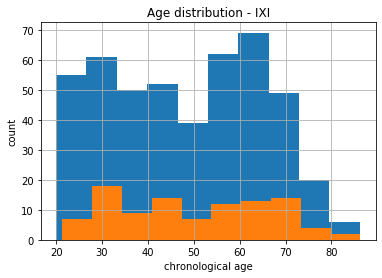

In [5]:
# load csv files with subject id and age
# environment variable DATA_DIR (defined in .env) leads to the data directory
train_csv = Path(os.environ.get('DATA_DIR')).joinpath('IXI/IXI_T1', 'config', 'IXI_T1_train_split0.csv')
val_csv = Path(os.environ.get('DATA_DIR')).joinpath('IXI/IXI_T1', 'config', 'IXI_T1_val_split0.csv')
test_csv  = Path(os.environ.get('DATA_DIR')).joinpath('IXI/IXI_T1', 'config', 'IXI_T1_test.csv')
# create dataframes
train_df = pd.read_csv(str(train_csv), header=None, names=['id', 'age'])
val_df = pd.read_csv(str(val_csv), header=None, names=['id', 'age'])
test_df = pd.read_csv(str(test_csv), header=None, names=['id', 'age'])
# append validation to train data
train_df = train_df.append(val_df)

train_df['age'].hist(bins=10)
test_df['age'].hist(bins=10)
plt.title('Age distribution - IXI')
plt.xlabel('chronological age')
plt.ylabel('count')
plt.show()

In [11]:
print(test_df['age'].min(), test_df['age'].max())
train_df.count()

21.38261464750171 86.3189596167009


id     463
age    463
dtype: int64

In [6]:
train_count, train_division = np.histogram(train_df['age'], bins=10, range=(10,100))
test_count, test_division = np.histogram(test_df['age'], bins=10, range=(10,100))
print('age','test_count', 'diff_count', 'train_count')
for k in range(train_count.shape[0]):
    print( train_division[k], test_count[k], train_count[k] - test_count[k], train_count[k])

age test_count diff_count train_count
10.0 0 0 0
19.0 7 60 67
28.0 22 57 79
37.0 18 48 66
46.0 10 51 61
55.0 18 81 99
64.0 19 46 65
73.0 5 17 22
82.0 1 3 4
91.0 0 0 0


### ADNI dataset

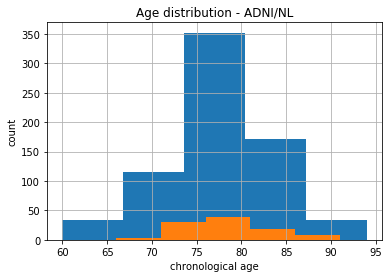

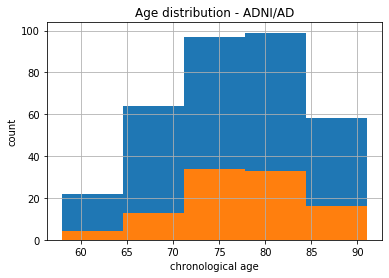

In [12]:
# load csv files with subject id and age
# environment variable DATA_DIR (defined in .env) leads to the data directory
train_csv = Path(os.environ.get('DATA_DIR')).joinpath('ADNI', 'config', 'GR_NL', 'NL_ADNI_T1_train_split0.csv')
val_csv   = Path(os.environ.get('DATA_DIR')).joinpath('ADNI', 'config', 'GR_NL', 'NL_ADNI_T1_val_split0.csv')
test_csv  = Path(os.environ.get('DATA_DIR')).joinpath('ADNI', 'config', 'GR_NL', 'NL_ADNI_T1_test_split.csv')
# create dataframes
nl_train_df = pd.read_csv(str(train_csv), header=None, names=['age', 'path'])
nl_val_df = pd.read_csv(str(val_csv), header=None, names=['age', 'path'])
nl_test_df = pd.read_csv(str(test_csv), header=None, names=['age', 'path'])
# append validation to train data
nl_train_df = nl_train_df.append(nl_val_df)

# load csv files with subject id and age
# environment variable DATA_DIR (defined in .env) leads to the data directory
train_csv = Path(os.environ.get('DATA_DIR')).joinpath('ADNI', 'config', 'GR_AD', 'AD_ADNI_T1_train_split0.csv')
val_csv   = Path(os.environ.get('DATA_DIR')).joinpath('ADNI', 'config', 'GR_AD', 'AD_ADNI_T1_val_split0.csv')
test_csv  = Path(os.environ.get('DATA_DIR')).joinpath('ADNI', 'config', 'GR_AD', 'AD_ADNI_T1_test_split.csv')
# create dataframes
ad_train_df = pd.read_csv(str(train_csv), header=None, names=['age', 'path'])
ad_val_df = pd.read_csv(str(val_csv), header=None, names=['age', 'path'])
ad_test_df = pd.read_csv(str(test_csv), header=None, names=['age', 'path'])
# append validation to train data
ad_train_df = ad_train_df.append(ad_val_df)

nl_train_df['age'].hist(bins=5)
nl_test_df['age'].hist(bins=5)
plt.title('Age distribution - ADNI/NL')
plt.xlabel('chronological age')
plt.ylabel('count')
plt.show()

ad_train_df['age'].hist(bins=5)
ad_test_df['age'].hist(bins=5)
plt.title('Age distribution - ADNI/AD')
plt.xlabel('chronological age')
plt.ylabel('count')
plt.show()

In [18]:
print(nl_test_df['age'].min(), nl_test_df['age'].max())
print(nl_train_df['age'].min(), nl_train_df['age'].max())
print(ad_test_df['age'].min(), ad_test_df['age'].max())
print(ad_train_df['age'].min(), ad_train_df['age'].max())
ad_train_df.count()

66.0 91.0
60.0 94.0
58.0 91.0
58.0 91.0


age     340
path    340
dtype: int64

In [86]:
train_count, train_division = np.histogram(ad_train_df['age'], bins=10, range=(50,100))
test_count, test_division = np.histogram(ad_test_df['age'], bins=10, range=(50,100))
print('age','test_count', 'diff_count', 'train_count')
for k in range(train_count.shape[0]):
    print( train_division[k], test_count[k], train_count[k] - test_count[k], train_count[k])

age test_count diff_count train_count
50.0 0 0 0
55.0 2 10 12
60.0 2 8 10
65.0 8 32 40
70.0 23 52 75
75.0 23 61 84
80.0 26 35 61
85.0 13 38 51
90.0 3 4 7
95.0 0 0 0


In [87]:
train_count, train_division = np.histogram(nl_train_df['age'], bins=10, range=(50,100))
test_count, test_division = np.histogram(nl_test_df['age'], bins=10, range=(50,100))
print('age','test_count', 'diff_count', 'train_count')
for k in range(train_count.shape[0]):
    print( train_division[k], test_count[k], train_count[k] - test_count[k], train_count[k])

age test_count diff_count train_count
50.0 0 0 0
55.0 0 0 0
60.0 0 23 23
65.0 3 17 20
70.0 23 144 167
75.0 38 205 243
80.0 26 145 171
85.0 9 60 69
90.0 1 10 11
95.0 0 0 0
